In [1]:
# load packages
import pandas as pd
import matplotlib.pyplot as plt
import cpi
%matplotlib inline

In [2]:
# update cpi
# cpi.update()

In [3]:
# load and inspect data
df = pd.read_csv('C:\\Users\\Jed\\iCloudDrive\\Documents\\Learn\Python\\Inflage\\dol_min_wage_scraped.csv')
df.head()

,location,1968,1970,1972,1976,1979,1980,1981,1988,1991,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Federal (FLSA),1.15,1.30,1.60,2.2,2.9,3.10,3.35,3.35,3.80,...,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
1,Alabama,1.15,1.30,1.60,2.2,2.9,3.10,3.35,3.35,3.80,...,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
2,Alaska,2.10,2.10,2.10,2.8,3.4,3.60,3.85,3.85,4.30,...,7.75,7.75,7.75,7.75,7.75,8.75,9.75,9.80,9.84,10.19
3,Arizona,18.72,18.72,18.72,2.2,2.9,3.10,3.35,3.35,3.80,...,7.25,7.35,7.65,7.80,7.90,8.05,8.05,10.00,10.50,12.00
4,Arkansas,1.25,1.10,1.20,1.9,2.3,2.55,2.70,3.25,3.35,...,6.25,6.25,6.25,6.25,6.25,7.50,8.00,8.50,8.50,9.25


In [4]:
# only federal minimum wage
df = df[df['location'] == "Federal (FLSA)"]

# transform df
columns = list(df.columns)
columns.remove('location')
df = pd.melt(df, id_vars = 'location', value_vars = columns)

In [5]:
# rename columns
df.columns = ['location', 'year', 'min_wage']

In [6]:
# convert year to datetime object to use the CPI library
df['year_date'] = pd.to_datetime(df['year'], format = '%Y')

In [7]:
# convert using CPI
df['adjusted_min_wage'] = df.apply(lambda x: cpi.inflate(x.min_wage, x.year_date), axis = 1)

<ipython-input-8-804f93fb7826>:24: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plot = plt.savefig('C:\\Users\\Jed\\iCloudDrive\\Documents\\Learn\Python\\Inflage\\inflage.png',


<Figure size 432x288 with 0 Axes>

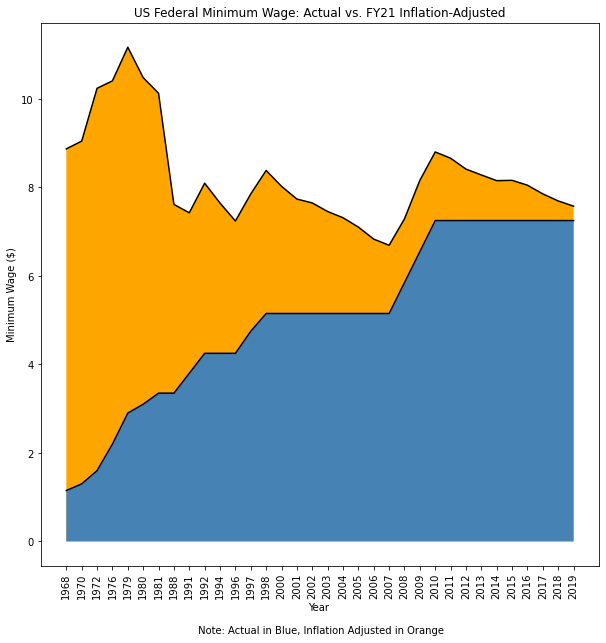

In [8]:
# clear plot and define figure size
plot = plt.clf()
plot = plt.figure(figsize = (10, 10))

# adjusted first since it's behind
plot = plt.plot(df['year'], df['adjusted_min_wage'], label = 'Minimum Wage (Actual USD)', color = 'black')
plot = plt.fill_between(df['year'], df['adjusted_min_wage'], facecolor = 'orange')

# actual next
plot = plt.plot(df['year'], df['min_wage'], label = 'Minimum Wage (Actual USD)', color = 'black')
plot = plt.fill_between(df['year'], df['min_wage'], facecolor = 'steelblue')

# rotate x axis
plot = plt.xticks(rotation = 'vertical')

# axis labels, new lines in xlabel is for makeshift caption
plot = plt.xlabel('Year \n \n Note: Actual in Blue, Inflation Adjusted in Orange')
plot = plt.ylabel('Minimum Wage ($)')

# title
plot = plt.title('US Federal Minimum Wage: Actual vs. FY21 Inflation-Adjusted')

# save figure
plot = plt.savefig('C:\\Users\\Jed\\iCloudDrive\\Documents\\Learn\Python\\Inflage\\inflage.png', 
        orientation='portrait',
        format = 'png',
        transparent = True,
        frameon = None,
        metadata = None)